<a href="https://colab.research.google.com/github/AgarwalMayank2/Face_Detection/blob/SVM_Ekta/SVM_prml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install important libraries to proceed**

In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

## Loading filtered_CNN_features_dataset

In [5]:
url_filtered_CNN_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_CNN_features_dataset.csv' #for CNN limited
df_CNN = pd.read_csv(url_filtered_CNN_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_CNN.drop('Unnamed: 0', axis=1, inplace=True)
df_CNN

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.266585,1.337187,1.352905,0.100848,1.880685,0.059888,2.773605,0.115643,0.138749,0.056121,...,0.039434,0.071662,0.733759,1.643910,0.041306,1.488236,0.048181,0.247783,0.300232,Paul_Bremer
1,0.355948,0.750634,0.909794,0.188214,0.680066,0.221442,3.089571,0.342022,0.087186,0.234741,...,0.093867,0.089694,0.859610,1.764073,0.250430,1.133540,0.004091,0.153542,0.236034,Paul_Bremer
2,0.267111,1.015316,1.154480,0.131544,1.066389,0.024949,3.701925,0.145037,0.082419,0.253356,...,0.080086,0.089589,0.663708,1.854499,0.078751,1.240009,0.065222,0.105058,0.227633,Paul_Bremer
3,0.260295,0.882900,0.885955,0.106698,2.663052,0.057836,1.854394,0.209269,0.103750,0.149302,...,0.181255,0.182038,0.397535,1.222931,0.007285,0.878194,0.016247,0.110492,0.129523,Paul_Bremer
4,0.347203,0.623839,0.817085,0.212599,1.026321,0.176634,2.486715,0.426571,0.345026,0.375072,...,0.267895,0.136346,0.713298,0.978184,0.059828,1.008205,0.042905,0.028597,0.199120,Paul_Bremer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0.110671,0.933532,1.576373,0.047225,0.697608,0.100375,2.509764,0.342827,0.115562,1.093016,...,0.161235,0.646160,0.615094,1.555704,0.093572,0.744401,0.186377,0.036658,0.164960,Charles_Moose
4320,0.250879,1.126343,0.961169,0.032000,0.247225,0.064331,2.297021,0.689515,0.502984,0.706359,...,0.322805,0.402172,0.624546,1.822085,0.377166,0.638106,0.105163,0.089668,0.067495,Charles_Moose
4321,0.101699,1.497757,0.805623,0.210569,1.158021,0.287555,1.315162,0.545735,0.269730,0.630467,...,0.252010,0.129211,1.347581,1.599726,0.049081,2.030167,0.162992,0.033966,0.037959,Charles_Moose
4322,0.108061,0.696727,1.336171,0.016554,0.625865,0.380914,2.106623,0.466441,0.081740,1.208193,...,0.168940,0.217983,0.425700,1.362742,0.245273,0.682824,0.271875,0.023275,0.111986,Charles_Moose


In [6]:
# Drop unnecessary columns:
if 'Unnamed: 0' in df_CNN.columns:
    df_CNN.drop('Unnamed: 0', axis=1, inplace=True)
-

In [7]:
# Separate features and labels
X = df_CNN.iloc[:, :-1]
y = df_CNN.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Restricting to 2 classes for binary SVM
unique_classes = np.unique(y_encoded)

if len(unique_classes) < 2:
  raise ValueError("Dataset must have at least 2 classes for binary classification.")
elif len(unique_classes) > 2:
  mask = y_encoded < 2
  X = X[mask]
  y_encoded = y_encoded[mask]

# Convert labels from {0, 1} to {-1, 1}
y_binary = np.where(y_encoded == 0, -1, 1)

# Ensure stratified split (16 training, 4 testing per class)
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_CNN = scaler.fit_transform(X_train_CNN)
X_test_CNN = scaler.transform(X_test_CNN)

In [15]:
# class SVM:
#   def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000, batch_size = 32):
#     self.lr = learning_rate
#     self.lambda_param = lambda_param
#     self.n_iters = n_iters
#     self.batch_size = batch_size
#     self.w = None
#     self.b = None

#   def fit(self, X, y):
#     n_samples, n_features = X.shape
#     self.w = np.zeros(n_features)
#     self.b = 0

#     for _ in range(self.n_iters):
#       indices = np.random.permutation(n_samples)
#       X_shuffled = X[indices]
#       y_shuffled = y[indices]

#       for start in range(0, n_samples, self.batch_size):
#         end = start + self.batch_size
#         X_batch = X_shuffled[start:end]
#         y_batch = y_shuffled[start:end]

#         for idx, xi in enumerate(X_batch):
#             condition = y_batch[idx] * (np.dot(xi, self.w) + self.b) >= 1
#             if condition:
#                 self.w -= self.lr * (2 * self.lambda_param * self.w)
#             else:
#                 self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(xi, y_batch[idx]))
#                 self.b -= self.lr * y_batch[idx]

#   def predict(self, X):
#     approx = np.dot(X, self.w) - self.b
#     return np.sign(approx)

# # Training SVM
# svm = SVM()
# svm.fit(X_train_CNN, y_train_CNN)

# # Predict
# predictions = svm.predict(X_test_CNN)

# # Evaluate
# accuracy = accuracy_score(y_test_CNN, predictions)
# print("Accuracy :", accuracy)

# # Print classification report
# print("\nClassification Report:\n")
# print(classification_report(y_test_CNN, predictions))

Accuracy : 0.42857142857142855

Classification Report:

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00         3

    accuracy                           0.43         7
   macro avg       0.33      0.33      0.33         7
weighted avg       0.43      0.43      0.43         7



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

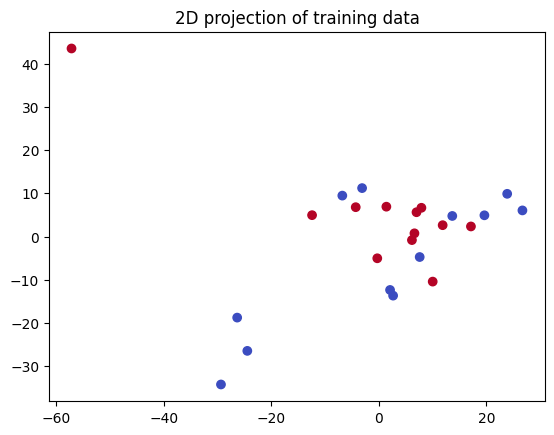

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_CNN)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_binary[:len(X_train_CNN)], cmap='coolwarm')
plt.title("2D projection of training data")
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Train SVM with RBF kernel
clf = SVC(kernel='rbf', gamma='scale', C=1.0)  # Try tuning C and gamma
clf.fit(X_train_CNN, y_binary[:len(X_train_CNN)])

# Predict and evaluate
preds_rbf = clf.predict(X_test_CNN)
print("Accuracy with RBF SVM:", accuracy_score(y_binary[len(X_train_CNN):], preds_rbf))
print("\nClassification Report:\n", classification_report(y_binary[len(X_train_CNN):], preds_rbf))

Accuracy with RBF SVM: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.71      0.83         7
           1       0.00      0.00      0.00         0

    accuracy                           0.71         7
   macro avg       0.50      0.36      0.42         7
weighted avg       1.00      0.71      0.83         7



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
